# Initialization

Import pandas to load our dataset csv.

In [15]:
import pandas as pd
data = pd.read_csv('vgsales.csv')

In [16]:
data

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


Notice that our supposed *target variables* are continuous, not discrete. We must convert it into a discrete data. So, we must find a way to bin or categorize them.

Categorizing through quantile is possible. I think using 5 as **q** should be enough.

In [17]:
data['Sales_Category'] = pd.qcut(data['Global_Sales'], q=5, labels=['Very Low','Low', 'Medium', 'High',  'Very High'])

In [18]:
data

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Sales_Category
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74,Very High
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,Very High
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82,Very High
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00,Very High
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,Very High
...,...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01,Very Low
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01,Very Low
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01,Very Low
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01,Very Low


# Data Representation

But if we try to graph our dataset into a scatter plot, we can see that it's not uniform and there is one game that is an outlier. Maybe if we get its variance and three means we can grasp how the data is spread throughout.


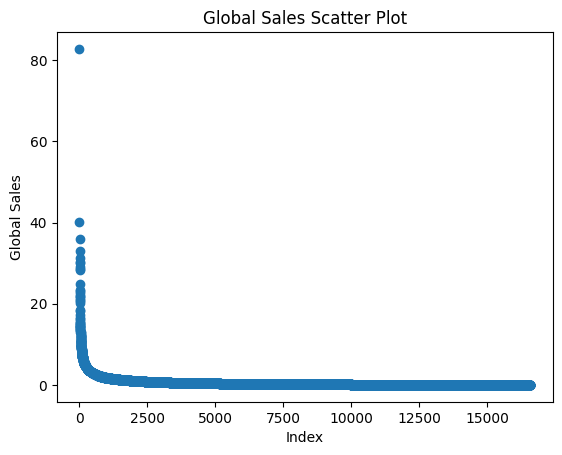

In [19]:
import matplotlib.pyplot as plt

global_sales = data['Global_Sales']
plt.scatter(range(len(global_sales)), global_sales)
plt.xlabel('Index')
plt.ylabel('Global Sales')
plt.title('Global Sales Scatter Plot')
plt.show()


As you can see, the average sales of all games is *537k* sales. So, we won't be using quantile to bin or categorize our `Global Sales`.

In [20]:
import numpy as np

global_sales = data['Global_Sales']

# Variance
variance = np.var(global_sales)

# Standard Deviation
std_deviation = np.std(global_sales)

# Mean
mean = np.mean(global_sales)

# Median
median = np.median(global_sales)


print("Variance:", variance)
print("Standard Deviation:", std_deviation)
print("Average:", mean)
print("Median:", median)

Variance: 2.417966193459794
Standard Deviation: 1.5549810910296606
Average: 0.5374406555006628
Median: 0.17


# Categorizing Global Sales

## Finding the right bin

To categorize global sales using logarithmic scaling, we can create bins that increase exponentially in powers of 10. The range of sales can start from 0 sales and go up to 100 million sales. Here's an example of how the bins could be defined:

1. Sales from 0 to 10: "No Sales"
2. Sales from 10 to 100: "Minimal Sales"
3. Sales from 100 to 1,000: "Low Sales"
4. Sales from 1,000 to 10,000: "Moderate Sales"
5. Sales from 10,000 to 100,000: "High Sales"
6. Sales from 100,000 to 1,000,000: "Very High Sales"
7. Sales from 1,000,000 to 10,000,000: "Exceptional Sales"
8. Sales from 10,000,000 to 100,000,000: "Record-breaking Sales"

By using logarithmic scaling, we can create categories that capture a wide range of sales values while maintaining a balanced representation across the bins. This approach is particularly useful when dealing with skewed sales distributions and allows for meaningful comparisons and analysis.

## Tagging the dataset

Define the sale categories

In [21]:
sales_bins = [0, 0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100]
sales_labels = ["No Sales", "Minimal Sales", "Low Sales", "Moderate Sales", "High Sales", "Very High Sales", "Exceptional Sales", "Record-breaking Sales"]


Create a new column `Sales_Category` based on global sales.


In [22]:
data['Sales_Category'] = pd.cut(data['Global_Sales'], bins=sales_bins, labels=sales_labels)
data

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Sales_Category
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74,Record-breaking Sales
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,Record-breaking Sales
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82,Record-breaking Sales
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00,Record-breaking Sales
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,Record-breaking Sales
...,...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01,Moderate Sales
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01,Moderate Sales
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01,Moderate Sales
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01,Moderate Sales


We now have 10 discrete categories for our target variable `Sales_Category`.

# Preparation for  Training

We will utilize the features platform, genre, and publisher to predict the category of a new game that is inserted. So, extract the features (X) and the target (y).

In [29]:
data = data.astype(str)

X = data[['Platform', 'Genre', 'Publisher']]
y = data['Sales_Category']

Since the features are all made of strings, there is a need to convert the values into numerical values. 

In [30]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()
X_encoded = vectorizer.fit_transform(X.apply(lambda x: ' '.join(x), axis=1))


Encode the target variable


In [31]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Training
Train the Naive Bayes classifier

In [33]:
from sklearn.naive_bayes import MultinomialNB

naive_bayes = MultinomialNB()
naive_bayes.fit(X_encoded, y_encoded)

MultinomialNB()

# Saving Trained Model
We will save the model for future use so that there is no need to retrain the model.

In [35]:
import pickle

with open('naive_bayes_model.pkl', 'wb') as file:
    pickle.dump(naive_bayes, file)

with open('label_encoder.pkl', 'wb') as file:
    pickle.dump(label_encoder, file)


# Loading Trained Model

At this point we are done with training the model. We simply need to load the file and start ~~blasting~~ categorizing.

In [37]:
with open('naive_bayes_model.pkl', 'rb') as file:
    loaded_model = pickle.load(file)

with open('label_encoder.pkl', 'rb') as file:
    label_encoder = pickle.load(file)


# Prepare New Data

In [49]:
platform = ['Wii', 'PS2']
genre = ['Action', 'Role-Playing']
publisher = ['Nintendo', 'Activision']

new_data = pd.DataFrame({'Platform': platform, 'Genre': genre, 'Publisher': publisher})


Then convert the string features to numerical representation


In [50]:
new_data_encoded = vectorizer.transform(new_data.apply(lambda x: ' '.join(x), axis=1))


Use the loaded model for prediction and convert the encoded predictions back to the original labels


In [51]:
predictions_encoded = loaded_model.predict(new_data_encoded)
predictions = label_encoder.inverse_transform(predictions_encoded)

print([p for p in predictions])

['Very High Sales', 'Very High Sales']


In [52]:
from sklearn.metrics import accuracy_score


train_predictions = naive_bayes.predict(X_encoded)

# Decode the encoded predictions and ground truth labels
train_predictions_decoded = label_encoder.inverse_transform(train_predictions)
y_decoded = label_encoder.inverse_transform(y_encoded)

# Calculate the accuracy
accuracy = accuracy_score(y_decoded, train_predictions_decoded)
print("Training Accuracy:", accuracy)


Training Accuracy: 0.595613929389083
